## 下面开始机器学习


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)

2.9.1


数据集来咯

In [2]:
import pickle

with open("唐诗处理后数据集.pickle", 'rb') as f:  #打开文件
    train_x, test_x, train_y, test_y = pickle.load(f)  #将二进制文件对象转换成 Python 对象
print(train_x[:2])

[[5069, 134, 2011, 266, 152, 273, 375, 0, 73, 566, 125, 60, 1313, 33, 1068, 1, 133, 28, 26, 2433, 39, 878, 433, 0, 252, 28, 590, 427, 151, 15, 591, 0, 27, 617, 8, 497, 88, 11, 337, 1], [944, 508, 10, 289, 215, 112, 837, 0, 1560, 22, 1339, 541, 39, 257, 1386, 1, 79, 647, 1750, 1177, 895, 41, 22, 0, 15, 1339, 129, 495, 44, 511, 748, 1]]


解读回去

In [3]:
import json

with open('中文到整数转换表.json') as f:
    j = json.load(f)
    # print(j)
    整数到中文转换表 = ['' for i in range(len(j))]
    for (汉字, 数字) in j.items():
        整数到中文转换表[数字] = 汉字
整数到中文转换表

['，',
 '。',
 '十',
 '卷',
 '百',
 '一',
 '不',
 '人',
 '三',
 '二',
 '四',
 '五',
 '山',
 '日',
 '六',
 '無',
 '八',
 '七',
 '風',
 '中',
 '上',
 '雲',
 '有',
 '九',
 '春',
 '白',
 '天',
 '何',
 '來',
 '月',
 '花',
 '水',
 '時',
 '相',
 '長',
 '君',
 '歸',
 '秋',
 '年',
 '為',
 '生',
 '自',
 '行',
 '江',
 '見',
 '夜',
 '心',
 '知',
 '李',
 '如',
 '此',
 '得',
 '清',
 '下',
 '高',
 '去',
 '南',
 '空',
 '明',
 '在',
 '子',
 '門',
 '事',
 '客',
 '送',
 '道',
 '未',
 '處',
 '居',
 '東',
 '別',
 '金',
 '歌',
 '王',
 '多',
 '青',
 '是',
 '寒',
 '玉',
 '城',
 '雨',
 '遠',
 '朝',
 '家',
 '落',
 '新',
 '出',
 '今',
 '與',
 '西',
 '應',
 '寄',
 '陽',
 '思',
 '千',
 '前',
 '聲',
 '入',
 '書',
 '路',
 '萬',
 '馬',
 '望',
 '草',
 '我',
 '同',
 '飛',
 '深',
 '樹',
 '和',
 '流',
 '開',
 '將',
 '盡',
 '酒',
 '獨',
 '還',
 '已',
 '聞',
 '回',
 '成',
 '地',
 '煙',
 '光',
 '詩',
 '公',
 '重',
 '可',
 '石',
 '誰',
 '色',
 '林',
 '欲',
 '從',
 '雪',
 '古',
 '作',
 '州',
 '方',
 '向',
 '更',
 '之',
 '：',
 '海',
 '首',
 '樓',
 '看',
 '舊',
 '老',
 '易',
 '張',
 '情',
 '滿',
 '身',
 '然',
 '後',
 '愁',
 '香',
 '名',
 '過',
 '言',
 '黃',
 '衣',
 '能',
 '外',
 '遊',
 '頭'

In [4]:
# https://blog.csdn.net/gavin_john/article/details/50717695 中括号取item运算符重载
def decode_poetry(num_array):
    return "".join(map(整数到中文转换表.__getitem__, num_array))


a = train_x[2200]
decode_poetry(a)

'浮雲金絡膝，昨日別朱輪。銜草如懷戀，嘶風尚意頻。曾將比君子，不是換佳人。從此西歸路，應容躡後塵。'

In [5]:
import json

with open('作者到整数转换表.json') as f:
    j = json.load(f)
    # print(j)
    整数到作者转换表 = ['' for i in range(len(j))]
    for (作者, 数字) in j.items():
        整数到作者转换表[数字] = 作者
整数到作者转换表

['白居易',
 '杜甫',
 '李白',
 '齊己',
 '劉禹錫',
 '元稹',
 '李商隱',
 '貫休',
 '韋應物',
 '陸龜蒙',
 '劉長卿',
 '許渾',
 '皎然',
 '杜牧',
 '羅隱',
 '張籍',
 '姚合',
 '錢起',
 '賈島',
 '孟郊',
 '王建',
 '岑參',
 '韓愈',
 '張祜',
 '皮日休',
 '王維',
 '溫庭筠',
 '權德輿',
 '方幹',
 '韋莊',
 '杜荀鶴',
 '盧綸',
 '韓偓',
 '張說',
 '戴叔倫',
 '李中',
 '吳融',
 '李端',
 '薛能',
 '孟浩然',
 '趙嘏',
 '徐鉉',
 '徐夤',
 '皇甫冉',
 '李群玉',
 '李賀',
 '顧況',
 '司空圖',
 '高適',
 '李嶠',
 '李頻',
 '鄭穀',
 '黃滔',
 '施肩吾',
 '周曇',
 '張九齡',
 '宋之問',
 '武元衡',
 '鮑溶',
 '耿湋',
 '李益',
 '儲光羲',
 '司空曙',
 '沈佺期',
 '王昌齡',
 '柳宗元',
 '馬戴',
 '朱慶餘',
 '張喬',
 '李洞',
 '唐彥謙',
 '韓翃',
 '胡曾',
 '楊巨源',
 '曹松',
 '羅鄴',
 '李鹹用',
 '劉得仁',
 '許棠',
 '李德裕',
 '李嘉佑',
 '李頎',
 '李紳',
 '駱賓王',
 '雍陶',
 '戎昱',
 '鄭谷',
 '劉商',
 '陳陶',
 '盧照鄰',
 '李涉',
 '呂岩',
 '蘇頲',
 '曹鄴',
 '呂溫',
 '劉滄',
 '張蠙',
 '崔塗',
 '項斯',
 '無可',
 '羊士諤',
 '周賀',
 '盧仝',
 '薛逢',
 '徐凝',
 '元結',
 '陳子昂',
 '李世民',
 '李建勳',
 '獨孤及',
 '王勃',
 '歐陽詹',
 '殷堯藩',
 '李山甫',
 '薛濤',
 '吳筠',
 '孫元晏',
 '劉駕',
 '劉兼',
 '郎士元',
 '顧非熊',
 '劉言史',
 '李郢',
 '嚴維',
 '章孝標',
 '崔道融',
 '王貞白',
 '李隆基',
 '喻鳧',
 '陳羽',
 '牟融',
 '楊衡',
 '孫逖',
 '汪遵',
 '裴夷直',
 '王周'

In [6]:
def decode_poet(num):
    return 整数到作者转换表[num]


a = train_y[2200]
print(a.dtype)
# print(a)
# a[0]
decode_poet(a)

int32


'劉禹錫'

整数数组必须在输入神经网络之前转换为张量。这种转换可以通过以下两种方式来完成：
将数组转换为表示单词出现与否的由 0 和 1 组成的向量，类似于 one-hot 编码。例如，序列[3, 5]将转换为一个 10,000 维的向量，该向量除了索引为 3 和 5 的位置是 1 以外，其他都为 0。然后，将其作为网络的首层——一个可以处理浮点型向量数据的稠密层。不过，这种方法需要大量的内存，需要一个大小为 num_words * num_reviews 的矩阵。
或者，我们可以填充数组来保证输入数据具有相同的长度，然后创建一个大小为 max_length * num_reviews 的整型张量。我们可以使用能够处理此形状数据的嵌入层作为网络中的第一层。
在本教程中，我们将使用第二种方法。
由于电影评论长度必须相同，我们将使用 pad_sequences 函数来使长度标准化：

In [7]:
print(max(map(len, train_x)))
print(max(map(len, test_x)))

64
64


In [8]:
l = list(map(len, train_x))
import pandas as pd

l_df = pd.DataFrame(l)
l_df.describe()  # 诗歌有多长

,0
count,14897.000000
mean,41.118547
std,8.677882
min,12.000000
25%,32.000000
50%,40.000000
75%,48.000000
max,64.000000


In [9]:
七言律诗长度 = 7 * 8 + 1 * 8

In [10]:
vocab_size = 7611
train_data = keras.preprocessing.sequence.pad_sequences(train_x,
                                                        value=vocab_size,
                                                        padding='post',
                                                        maxlen=七言律诗长度)

test_data = keras.preprocessing.sequence.pad_sequences(test_x,
                                                       value=vocab_size,
                                                       padding='post',
                                                       maxlen=七言律诗长度)

In [11]:
print(decode_poetry([i for i in test_data[0] if i != vocab_size]))
print(decode_poet(test_y[0]))
len(train_data[0]), len(train_data[1])

癡頑終日羨人閑，卻喜因官得近山。斜對寺樓分寂寂，文案把來看未會，雖書一字甚慚顏。
王建


(64, 64)

In [12]:
print(set(train_y))
print(set(test_y))
print(max(len(set(train_y)), len(set(test_y))))
len(set(train_y))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 57, 59, 62, 67, 68, 72}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 57, 59, 62, 67, 68, 72}
60


60

In [13]:
new_author2old_author = list(set(train_y))
new_author2old_author
old_author2new_author = dict()
for i in range(len(new_author2old_author)):
    old_author2new_author[new_author2old_author[i]] = i
old_author2new_author

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 57: 54,
 59: 55,
 62: 56,
 67: 57,
 68: 58,
 72: 59}

In [14]:
train_label = np.array(list(map(old_author2new_author.__getitem__, train_y)), int)
test_label = np.array(list(map(old_author2new_author.__getitem__, test_y)), int)
test_label

array([20, 32, 31, ..., 16, 14, 29])

In [24]:
from keras import regularizers
import tensorflow_hub as hub

# 输入形状是用于诗词的汉字数目（7611 词）
vocab_size = 7611 + 1
poets = 60

model = keras.Sequential()
# 第一维始终是batch的大小。
model.add(keras.layers.Embedding(vocab_size, 16))  # 变成16个字
# 官方解释：查找每个词索引的嵌入向量（embedding vector）
# 嵌入向量是16维的。
# 对于一系列batch的数据，把bx56 嵌入到b个 不知道多长的，每个单词变长16维向量的一个向量
model.add(keras.layers.GlobalAveragePooling1D())  # 把变长的张量变长定长的？
# 对于每一个 嵌入向量，每个单词16维，一句话不定长，直接把一句话的词向量求平均加起来。
# model.add(keras.layers.Dense(poets * 16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dense(poets * 10, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(poets, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dense(poets, activation='softmax', ))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          121792    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 600)               10200     
                                                                 
 dense_3 (Dense)             (None, 60)                36060     
                                                                 
Total params: 168,052
Trainable params: 168,052
Non-trainable params: 0
_________________________________________________________________


In [25]:
def categorical_squared_hinge(y_true, y_pred):
    """
    hinge with 0.5*W^2 ,SVM
    """
    y_true = 2. * y_true - 1  # trans [0,1] to [-1,1]，注意这个，svm类别标签是-1和1
    vvvv = keras.maximum(1. - y_true * y_pred, 0.)  # hinge loss，参考keras自带的hinge loss
    #    vvv = K.square(vvvv) # 文章《Deep Learning using Linear Support Vector Machines》有进行平方
    vv = keras.sum(vvvv, 1, keepdims=False)  #axis=len(y_true.get_shape()) - 1
    v = keras.mean(vv, axis=-1)
    return v

In [26]:
import os

batch_size = 16
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1
                                                 , save_freq=5 * batch_size)

In [27]:
# model.compile(optimizer='adam',
#               loss=categorical_squared_hinge,
#               metrics=['accuracy'])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])

In [28]:
from keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
    monitor='val_accuracy', min_delta=0.0001,
    patience=1)

In [29]:
model.fit(train_data, train_label, epochs=10000,
          validation_data=(test_data, test_label),
          callbacks=[cp_callback, earlystop_callback],
          batch_size=batch_size,
          verbose=1)


Epoch 1/10000
 70/932 [=>............................] - ETA: 3s - loss: 4.0316 - sparse_categorical_accuracy: 0.0920
Epoch 1: saving model to training_1\cp.ckpt
143/932 [===>..........................] - ETA: 2s - loss: 3.9759 - sparse_categorical_accuracy: 0.0970
Epoch 1: saving model to training_1\cp.ckpt
224/932 [======>.......................] - ETA: 2s - loss: 3.9586 - sparse_categorical_accuracy: 0.0965
Epoch 1: saving model to training_1\cp.ckpt
315/932 [=========>....................] - ETA: 2s - loss: 3.9510 - sparse_categorical_accuracy: 0.0966
Epoch 1: saving model to training_1\cp.ckpt
398/932 [===========>..................] - ETA: 1s - loss: 3.9392 - sparse_categorical_accuracy: 0.0985
Epoch 1: saving model to training_1\cp.ckpt
467/932 [==============>...............] - ETA: 1s - loss: 3.9314 - sparse_categorical_accuracy: 0.0989
Epoch 1: saving model to training_1\cp.ckpt
549/932 [================>.............] - ETA: 1s - loss: 3.9312 - sparse_categorical_accuracy: 0

KeyboardInterrupt: 

In [30]:
results = model.evaluate(test_data, test_label, verbose=2)
print(results)  # 好垃圾，没有加隐藏层，对测试集反而好呢

117/117 - 0s - loss: 21.8670 - sparse_categorical_accuracy: 0.1866 - 209ms/epoch - 2ms/step
[21.86703109741211, 0.1865771859884262]


In [119]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

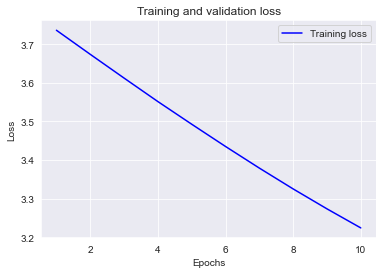

In [120]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
loss = history_dict['loss']

epochs = range(1, len(acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'b', label='Training loss')
# b代表“蓝色实线”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [105]:
# model(train_data[0])

ValueError: Exception encountered when calling layer "sequential_10" (type Sequential).

Input 0 of layer "global_average_pooling1d_10" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (56, 16)

Call arguments received by layer "sequential_10" (type Sequential):
  • inputs=tf.Tensor(shape=(56,), dtype=int32)
  • training=None
  • mask=None